# Choosing most common logP value from duplicated measurements

1. Initial size of dataset was $14111$

2. After choosing most common logP values $13777$ rows have left

In [1]:
import pandas as pd
import os
import seaborn as sns

In [8]:
DATASET_PATH = '../data/3_final_data/'
SMILES_COLUMN = 'smiles'
VALUE_COLUMN = 'logP'

In [3]:
dataset = pd.read_csv(os.path.join(DATASET_PATH, 'logP.csv'))

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14111 entries, 0 to 14110
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   smiles  14111 non-null  object 
 1   logP    14111 non-null  float64
dtypes: float64(1), object(1)
memory usage: 220.6+ KB


In [5]:
dataset_wo_averaging = dataset.groupby([SMILES_COLUMN]).agg(lambda x:x.value_counts().index[0])

In [10]:
dataset_wo_averaging.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13777 entries, BrC(Br)(Br)Br to n1onc2c1NC1Nc3nonc3NC1N2
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   logP    13777 non-null  float64
dtypes: float64(1)
memory usage: 215.3+ KB


## Check logP values distribution

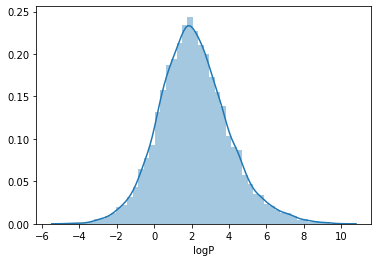

In [9]:
sns.distplot(dataset_wo_averaging[VALUE_COLUMN])

In [11]:
ranges = [-20, -10, -5, 0, 10, 20, 30, 40, 50]
dataset_wo_averaging[VALUE_COLUMN].groupby(pd.cut(dataset_wo_averaging[VALUE_COLUMN], ranges)).count()

logP
(-20, -10]        0
(-10, -5]         0
(-5, 0]        1541
(0, 10]       12236
(10, 20]          0
(20, 30]          0
(30, 40]          0
(40, 50]          0
Name: logP, dtype: int64

In [13]:
DATASET_OTPUT_PATH = '../data/3_final_data/'

In [14]:
dataset_wo_averaging.to_csv(os.path.join(DATASET_OTPUT_PATH,'logp_wo_averaging.csv'))

# Split data

In [19]:
def train_test_validation_split(df):
    from sklearn.model_selection import train_test_split
    train_data, rest_data = train_test_split(df, test_size=0.3)
    test_data, validation_data = train_test_split(rest_data, test_size=0.5)
    return train_data.reset_index(drop=True), validation_data.reset_index(drop=True), test_data.reset_index(drop=True)

In [23]:
DATA_PATH = '../data/3_final_data/'

file = 'logp_wo_averaging'

In [24]:
data = pd.read_csv(os.path.join(DATASET_OTPUT_PATH, file+'.csv'))


print(file, 'shape: ', data.shape)    
train, validation, test = train_test_validation_split(data)
print('SPLITTED SHAPES:\n\ttrain: {0}\n\tvalidation: {1}\n\ttest: {2}\n'.format(train.shape, validation.shape, test.shape))

train.to_csv(DATA_PATH + 'split_data/' + file + '_train.csv')
validation.to_csv(DATA_PATH + 'split_data/' + file + '_validation.csv')
test.to_csv(DATA_PATH + 'split_data/' + file + '_test.csv')

logp_wo_averaging shape:  (13777, 2)
SPLITTED SHAPES:
	train: (9643, 2)
	validation: (2067, 2)
	test: (2067, 2)

